# <center><u><font color = red> Task #1 : Prediction using Supervised ML 

So, our task is to predict the percentage of a student based on the number of study hours. Yes, it is a simple linear regression as it involves just 2 variables.

Here we go.

**Importing Necessary Packages for the task**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.linear_model import LinearRegression


**Loading the Dataset and having its overview**

In [2]:
url = 'http://bit.ly/w-data'
stu = pd.read_csv(url)
stu.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
stu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
stu.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Checking for Duplicate and Null values.**

In [5]:
stu.duplicated().sum()

0

In [6]:
stu.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Now lets have a look on how does the two variable vary**

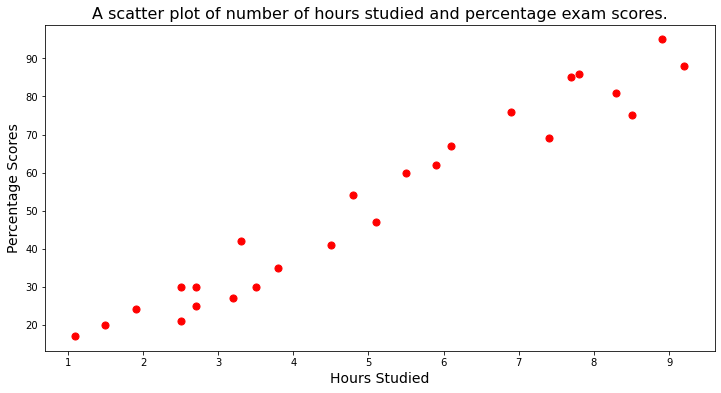

In [7]:
stu.plot(kind = 'scatter', x='Hours', y='Scores', style= 'o', figsize=(12,6),color = 'r', s = 50)

plt.title("A scatter plot of number of hours studied and percentage exam scores.",fontsize = 16)

plt.xlabel('Hours Studied',fontsize = 14)
plt.ylabel('Percentage Scores',fontsize = 14)
plt.show()

As per the above plot we can notice that there is a positive and linear relation between Hours studied and Percentage Scores and we can verify it by correlation method in the cell below.

In [8]:
stu.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Preparing the Data**

**Now we'll create two arrays having values of hours in "X" and values of Percentage Scores in "Y"**

In [26]:
X = stu.iloc[:,0].values.reshape(-1,1)
Y = stu.iloc[:,1].values

In [25]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [24]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**Let's Split our data for training and testing.**

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 0)bb

### **Training the algorithm**

In [28]:
Lr  = LinearRegression()
Lr.fit(X_train,Y_train)
print("Training the model with data")

Training the model with data


In [29]:
print("The value of coeff :",Lr.coef_)
print("The value of intercept :",Lr.intercept_)

The value of coeff : [9.91065648]
The value of intercept : 2.018160041434683


**Plotting the Regression Line**

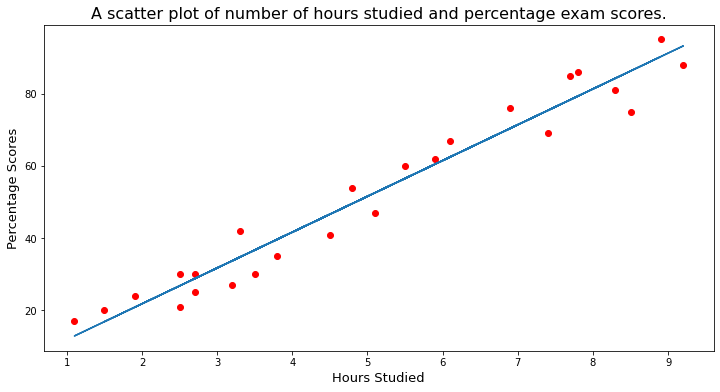

In [30]:
reg_line = Lr.coef_ * X + Lr.intercept_

plt.figure(figsize=(12,6))
plt.scatter(X,Y,color = 'r')

plt.title("A scatter plot of number of hours studied and percentage exam scores.",fontsize = 16)
plt.xlabel('Hours Studied',fontsize = 13)
plt.ylabel('Percentage Scores',fontsize = 13)
plt.plot(X,reg_line)

plt.show()

### **Making Predictions**

In [31]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [32]:
Yhat = Lr.predict(X_test)
Yhat

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Let's compare Predicted values with actual ones.**

In [35]:
ds = pd.DataFrame({'Actual Values':Y_test, 'Predicted Values':Yhat.round(2)})
ds

,Actual Values,Predicted Values
0,20,16.88
1,27,33.73
2,69,75.36
3,30,26.79
4,62,60.49


**R-squared Value**

In [40]:
print("R-squared value of training dataset :",Lr.score(X_train,Y_train).round(5))
print("R-squared value of testing dataset :",Lr.score(X_test,Y_test).round(5))

R-squared value of training dataset : 0.95155
R-squared value of testing dataset : 0.94549


**Let's plot a bar chart**

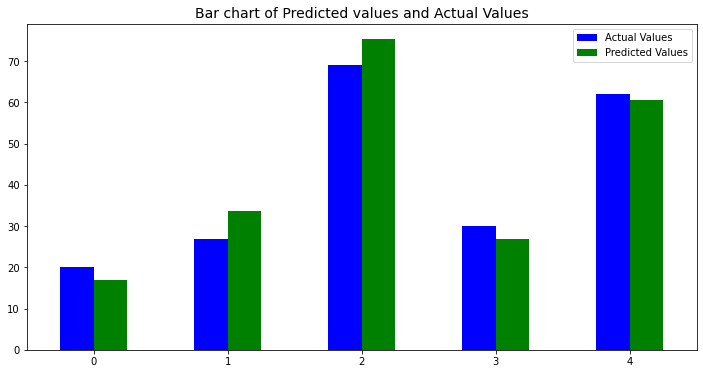

In [48]:
ds.plot(kind = 'bar', figsize=(12,6),color=('blue','green'))
plt.title("Bar chart of Predicted values and Actual Values",fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

### **Making Prediction**

In [58]:
hours = 9.25
test = np.array([hours]).reshape(-1,1)
ps = Lr.predict(test)
print("No.of hours studied :",hours)
print(f"Predicted Score : {ps[0].round(4)}")

No.of hours studied : 9.25
Predicted Score : 93.6917


### So, 93.69% is the score that a student is expected to score after studying 9.25 hours/day

### **Evaluating the model**

In [62]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Yhat).round(5)) 
print('Mean Squared Error:',metrics.mean_squared_error(Y_test, Yhat).round(5))
print('R2-value:',r2_score(Y_test, Yhat).round(5))

Mean Absolute Error: 4.18386
Mean Squared Error: 21.59877
R2-value: 0.94549
